# EDA

## I. Baseline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.shape

(891, 12)

Проверяем данные на наличие нулевых значений. Замечаем, что признак "Cabin" на 77% состоит из пустых значений. Небольшая часть значений признаков "Age" и "Embarked" содержит нули.

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# сразу удалим колонку 'Cobin'
bl_df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [23]:
bl_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Проверяем есть ли в данных повторяющиеся объекты. В результате выполнения кода видим, что дубликатов нет.

In [24]:
df.duplicated().any()

False

### Заполнение нулей

In [25]:
bl_df.Age = df.Age.fillna(df.Age.median())
bl_df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [26]:
bl_df = pd.get_dummies(
        bl_df,
        columns=['Embarked'],
        drop_first=True,
)

In [29]:
bl_df.Sex = df.Sex.replace({'female': 1, 'male': 0})

In [30]:
bl_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,28.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


In [33]:
X = bl_df.drop('Survived', axis=1).values
y = bl_df.Survived.values

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


for n in [3, 5, 7]:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  preds_valid = knn.predict(X_valid)
  print('При количестве соседей: {}'.format(n))
  print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
  print(f'Precision = {precision_score(y_valid, preds_valid)}')
  print(f'Recall    = {recall_score(y_valid, preds_valid)}')
  



При количестве соседей: 3
Accuracy  = 0.7318435754189944
Precision = 0.7288135593220338
Recall    = 0.5733333333333334
При количестве соседей: 5
Accuracy  = 0.7262569832402235
Precision = 0.7096774193548387
Recall    = 0.5866666666666667
При количестве соседей: 7
Accuracy  = 0.7318435754189944
Precision = 0.7213114754098361
Recall    = 0.5866666666666667


<Axes: >

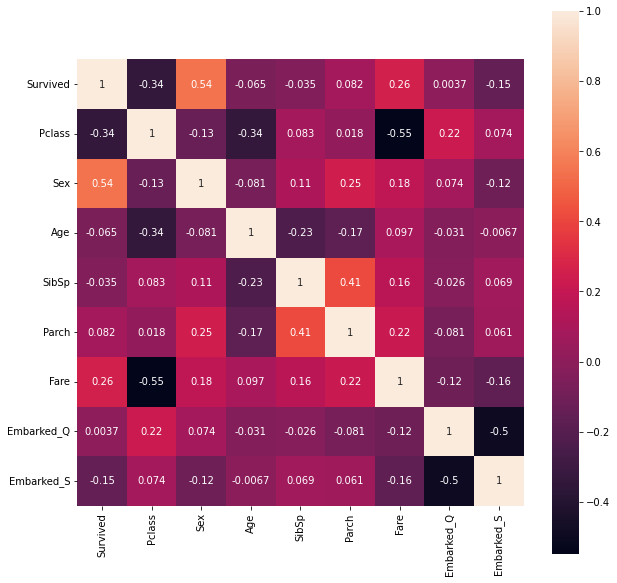

In [41]:
plt.subplots(figsize=(10, 10))
sns.heatmap(bl_df.corr(), square=True, annot=True)